In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/ST001237_AN002055.csv')
df.head()

,Sample ID,Time point,OS_Censor (1 means the time is a censoring time and 0 means a failure time in OS),CRF_MSKCC_Risk_Group,Treatment,Prior antiangiogenic regimens (≥2),"OS (Overall Survival, months)",Trial,Region,Derived_Age_at_Consent,...,C36:2 PS plasmalogen,C16:0 ceramide (d18:1),C24:1 ceramide (d18:1),C14:0 SM,C16:1 SM,C16:0 SM,C18:1 SM,C18:2 SM,C18:0 SM,C20:0 SM
0,CA209025-98-673_baseline,baseline,-,INTERMEDIATE,NIVOLUMAB,True,11.499,Phase III_RCC_CA209025,REST OF WOR.D,76,...,5.891,5.949,6.578,6.826,6.850,7.616,6.621,5.167,6.935,6.982
1,CA209025-98-547_baseline,baseline,-,POOR,NIVOLUMAB,False,9.396,Phase III_RCC_CA209025,REST OF WOR.D,48,...,5.767,6.003,6.600,6.477,6.732,7.499,6.734,5.124,7.054,6.811
2,CA209025-97-765_baseline,baseline,1,FAVORABLE,NIVOLUMAB,False,44.058,Phase III_RCC_CA209025,REST OF WOR.D,74,...,5.795,6.004,6.532,6.472,6.612,7.478,6.492,4.747,6.856,6.794
3,CA209025-97-569_baseline,baseline,-,INTERMEDIATE,NIVOLUMAB,True,29.766,Phase III_RCC_CA209025,REST OF WOR.D,65,...,5.580,5.611,6.419,6.405,6.650,7.444,6.441,4.794,6.735,6.720
4,CA209025-97-264_baseline,baseline,1,FAVORABLE,NIVOLUMAB,True,48.197,Phase III_RCC_CA209025,REST OF WOR.D,56,...,5.891,5.692,6.636,6.372,6.456,7.333,6.237,4.450,6.633,6.551


1

Text(0.5, 0.98, 'Metabolite distribution by Phenotypes')

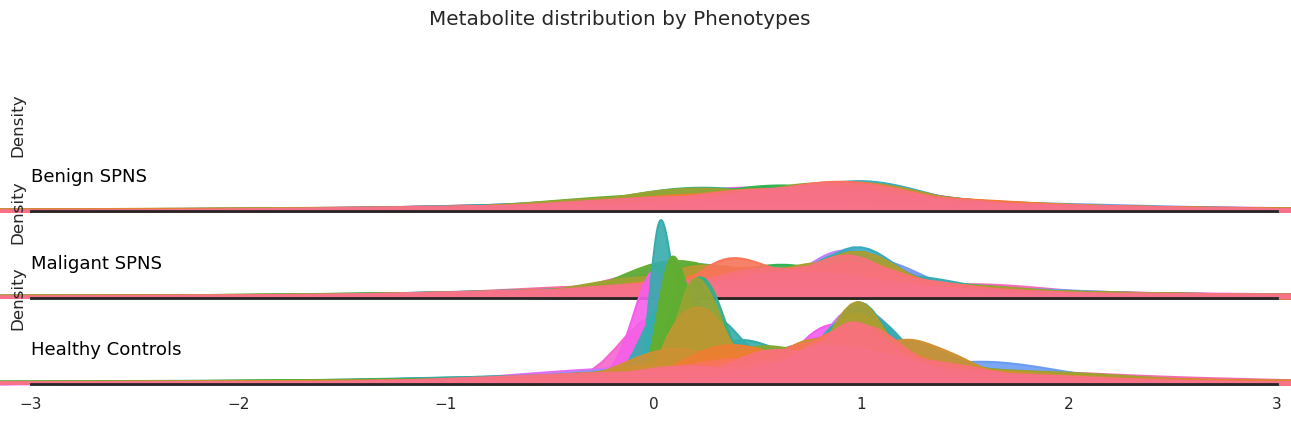

In [29]:

# Theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth': 2})
g = sns.FacetGrid(sub_df, row="Phenotypes", hue="Phenotypes", aspect=9, height=1.5)

# map df to plot, color group by phenotypes
g.map_dataframe(sns.kdeplot, fill=True, linewidth=1.5, alpha=.9,  clip_on=False)


# function to draw labels
def label(x, color, label):
    ax = plt.gca()  #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)


# iterate grid to plot labels
g.map(label, "Phenotypes")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

#viewport beetwen 0 and 1
g.set(xlim=(-3, 3))


# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('Metabolite distribution by Phenotypes', y=0.98)